# Exploration

In [4]:
PATH_TREEBANK = "../data/sud_naija-NSC.with_prediction.conllu"

In [5]:
# le fichier est t-il bien présent ?
try:
    with open(PATH_TREEBANK, "r") as f:
        print("Le fichier est présent au chemin : {}".format(PATH_TREEBANK))
        pass
except FileNotFoundError:
    print("Le fichier n'est PAS , revoyez le chemin : {}".format(PATH_TREEBANK))
    exit()

Le fichier est présent au chemin : ../data/sud_naija-NSC.with_prediction.conllu


In [6]:
# On peut commencer à parser le fichier avec la librairie conllup
from conllup.conllup import readConlluFile 
sentences = readConlluFile(PATH_TREEBANK)

if len(sentences) == 0:
    raise ValueError("Le fichier est vide !")
else :
    print("Le fichier contient {} phrases".format(len(sentences)))

Le fichier contient 8259 phrases


In [8]:
# A quoi ressemble notre objet "sentence"
import json
print(json.dumps(sentences[0], indent=4)) 

{
    "metaJson": {
        "sent_id": "IBA_01_Fola-Lifestory_MG__1",
        "sound_url": "http://www.tal.univ-paris3.fr/trameur/iTrameur-naija/mp3/IBA_01_Fola-Lifestory_MG.mp3",
        "speaker_id": "Sp360",
        "text": "life for me as small pikin dey hard small o //",
        "text_en": "Life for me as a child was a bit hard.",
        "text_ortho": "Life for me as small pikin dey hard small o.",
        "timestamp": "1591368564.075782"
    },
    "treeJson": {
        "nodesJson": {
            "1": {
                "ID": "1",
                "FORM": "life",
                "LEMMA": "life",
                "UPOS": "NOUN",
                "XPOS": "_",
                "FEATS": {},
                "HEAD": 7,
                "DEPREL": "subj",
                "DEPS": {},
                "MISC": {
                    "AlignBegin": "1580",
                    "AlignEnd": "1950",
                    "Gloss": "life",
                    "deprel_main_pred": "subj",
                    

Nous pouvons retrouver, dans `sentence["metaJson"]`, les meta-informations des phrases du conllu :
- `sent_id`: identifiant de la phrase dans le treebank.
- `sound_url`: lien url de l'audio de la phrase (ce treebank NaijaSynCor est un corpus oral) .
- `speaker_id`: identifiant (anonymisé) du locuteur.
- `text`: version "prosodique" du texte. Les ponctuations sont plus riches et des marqueurs prosodiques (retranscrivant l'oral) sont ajoutés.
- `text_en`: traduction anglaise.
- `text_ortho`: version littéraire du texte.
- `timestamp`: date de la dernière annotation.


In [9]:
# voici donc ces meta-données seulement
print(json.dumps(sentences[0]['metaJson'], indent=4)) 

{
    "sent_id": "IBA_01_Fola-Lifestory_MG__1",
    "sound_url": "http://www.tal.univ-paris3.fr/trameur/iTrameur-naija/mp3/IBA_01_Fola-Lifestory_MG.mp3",
    "speaker_id": "Sp360",
    "text": "life for me as small pikin dey hard small o //",
    "text_en": "Life for me as a child was a bit hard.",
    "text_ortho": "Life for me as small pikin dey hard small o.",
    "timestamp": "1591368564.075782"
}


In [10]:
# Comment accéder aux tokens ?
# ils sont imbriqués dans sentence['treeJson']['nodesJson']
sentence_tokens = sentences[0]['treeJson']['nodesJson']
print(json.dumps(sentence_tokens, indent=4))


{
    "1": {
        "ID": "1",
        "FORM": "life",
        "LEMMA": "life",
        "UPOS": "NOUN",
        "XPOS": "_",
        "FEATS": {},
        "HEAD": 7,
        "DEPREL": "subj",
        "DEPS": {},
        "MISC": {
            "AlignBegin": "1580",
            "AlignEnd": "1950",
            "Gloss": "life",
            "deprel_main_pred": "subj",
            "head_MST": "2",
            "upostag": "NOUN"
        }
    },
    "2": {
        "ID": "2",
        "FORM": "for",
        "LEMMA": "for",
        "UPOS": "ADP",
        "XPOS": "_",
        "FEATS": {},
        "HEAD": 1,
        "DEPREL": "mod",
        "DEPS": {},
        "MISC": {
            "AlignBegin": "1950",
            "AlignEnd": "2180",
            "Gloss": "for",
            "deprel_main_pred": "root",
            "head_MST": "0",
            "upostag": "ADP"
        }
    },
    "3": {
        "ID": "3",
        "FORM": "me",
        "LEMMA": "me",
        "UPOS": "PRON",
        "XPOS": "_",
      

In [11]:
# Les tokens sont donc dans un dictionnaire avec comme clé l'ID du token 
# et comme valeur un dictionnaire avec les informations du token

# Regardons le premier token
print(json.dumps(sentence_tokens['1'], indent=4))

{
    "ID": "1",
    "FORM": "life",
    "LEMMA": "life",
    "UPOS": "NOUN",
    "XPOS": "_",
    "FEATS": {},
    "HEAD": 7,
    "DEPREL": "subj",
    "DEPS": {},
    "MISC": {
        "AlignBegin": "1580",
        "AlignEnd": "1950",
        "Gloss": "life",
        "deprel_main_pred": "subj",
        "head_MST": "2",
        "upostag": "NOUN"
    }
}


Voici la composition d'un token au format json (voir [spécifications officielles ici](https://universaldependencies.org/format.html) )
- `ID`: Identifiant du token dans la phrase,
- `FORM`: Forme du token,
- `LEMMA`: Lemme du token,
- `UPOS`: Catégorie du discours universelle (Universal Part Of Speech)
- `XPOS`: Catégorie du discours **optionnelle**
- `FEATS`: Liste de features morphologiques de l'inventaire universel ou d'une extension spécifique à la langue
- `HEAD`: Identifiant du gouverneur du token (0 si le token est la tête de la phrase)
- `DEPREL`: Relation de dépendance avec le gouverneur (`root` si le token est la tête de la phrase)
- `DEPS`: Graphes de dépendances améliorés sous la forme d'une liste de paires tête-déprel 
- `MISC`: Toutes les autres données non universelles peuvent être insérées dans cet objet MISC. Voici quelques exemples de valeur misc
    - `AlignBegin`: alignement temporelle **du début** du token dans l'audio de la phrase (en milliseconde)
    - `AlignEnd`: alignement temporelle de **la fin** du token dans l'audio de la phrase (en milliseconde),
    - `Gloss`: glose anglaise
    - `upos_pred`: Catégorie du dicours **prédit**
    - `head_pred`: Identifiant **prédit** du gouverneur,
    - `deprel_pred`: Relation de dépendance **prédite**,


In [12]:
# Maintenant qu'on connait la structure, on peut compter le nombre de tokens dans tous le corpus
nb_tokens = 0
for sentence in sentences:
    nb_tokens += len(sentence['treeJson']['nodesJson'])
print("Le corpus contient {} tokens".format(nb_tokens))



Le corpus contient 131042 tokens


In [13]:
# calculons le nombre de tokens par phrase en moyenne dans ce corpus
nb_tokens = 0
for sentence in sentences:
    nb_tokens += len(sentence['treeJson']['nodesJson'])
print("Le corpus contient {} tokens".format(nb_tokens))
print("Le corpus contient {} phrases".format(len(sentences)))
print("Le nombre moyen de tokens par phrase est de {}".format(nb_tokens/len(sentences)))

Le corpus contient 131042 tokens
Le corpus contient 8259 phrases
Le nombre moyen de tokens par phrase est de 15.866569802639544


## Visualisation
Regardons nos données via des graphes.

In [36]:
# Nous utilisons matplotlib pour faire faire nos graphiques
import matplotlib as mpl

# Voici des paramètres pour que les graphiques soient plus lisibles, changez les à votre convenance
params = {
   'axes.labelsize': 8,
 #  'text.fontsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [10, 5]
   }
mpl.rcParams.update(params)
plt.style.use('seaborn-v0_8-darkgrid') # pour avoir un fond gris quadrillé

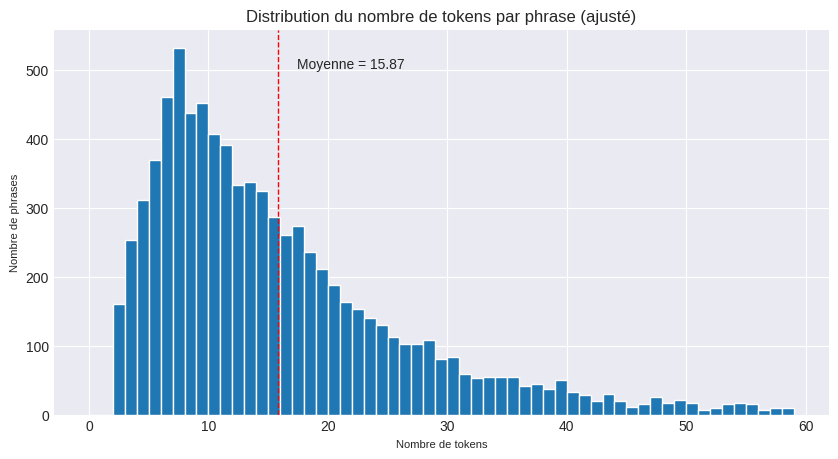

In [39]:
# Affichons la distribution des tokens par phrase

## Recupérons le nombre de tokens par phrase dans une liste
tokens_per_sentence = []
for sentence in sentences:
    tokens_per_sentence.append(len(sentence['treeJson']['nodesJson']))

## Traçons l'histogramme
plt.hist(tokens_per_sentence, bins=range(0, 60), edgecolor='white') 
plt.title("Distribution du nombre de tokens par phrase (ajusté)") # ajoute un titre au graphique
plt.xlabel("Nombre de tokens") # ajoute un titre à l'axe des abscisses
plt.ylabel("Nombre de phrases") # ajoute un titre à l'axe des ordonnées


## Optionel : Ajoutons une ligne verticale rouge pour la moyenne
length_mean = nb_tokens/len(sentences)
plt.axvline(x=length_mean, color='red', linestyle='dashed', linewidth=1) # place la ligne verticale de moyenne (en rouge)
plt.text(length_mean*1.1, plt.ylim()[1]*0.9, 'Moyenne = {:.2f}'.format(length_mean)) # place la légende de la ligne verticale


## Affichons le graphique
plt.show()

In [53]:
# Faisons une fonction "counter" qui, depuis une liste d'étiquettes, retourne un dictionnaire avec le nombre d'occurences de chaque étiquette
# le compteur doit être ordonné par ordre alphabétique
def make_counter(labels):
    counter = {}
    for label in labels:
        if label in counter:
            counter[label] += 1
        else:
            counter[label] = 1
    # sort alphabetically before return
    counter = {k: v for k, v in sorted(counter.items(), key=lambda item: item[0])}
    return counter




# testons sur une liste exemple
labels = ["VERB", "NOUN", "NOUN", "VERB", "VERB"]
print(make_counter(labels))

{'NOUN': 2, 'VERB': 3}


In [54]:
# Affichons la distribution des différentes catégories du discours (UPOS)

## Recupérons le nombre de tokens par phrase dans une liste
upos = []
for sentence in sentences:
    for token in sentence['treeJson']['nodesJson'].values():
        upos.append(token['UPOS'])

upos_counter = make_counter(upos)
print(json.dumps(upos_counter, indent=4))


{
    "ADJ": 3348,
    "ADP": 6573,
    "ADV": 5794,
    "AUX": 8635,
    "CCONJ": 1584,
    "DET": 4981,
    "INTJ": 1915,
    "NOUN": 13807,
    "NUM": 1323,
    "PART": 4416,
    "PRON": 16827,
    "PROPN": 2168,
    "PUNCT": 37170,
    "SCONJ": 4648,
    "VERB": 17341,
    "X": 482,
    "_": 30
}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'ADJ'),
  Text(1, 0, 'ADP'),
  Text(2, 0, 'ADV'),
  Text(3, 0, 'AUX'),
  Text(4, 0, 'CCONJ'),
  Text(5, 0, 'DET'),
  Text(6, 0, 'INTJ'),
  Text(7, 0, 'NOUN'),
  Text(8, 0, 'NUM'),
  Text(9, 0, 'PART'),
  Text(10, 0, 'PRON'),
  Text(11, 0, 'PROPN'),
  Text(12, 0, 'PUNCT'),
  Text(13, 0, 'SCONJ'),
  Text(14, 0, 'VERB'),
  Text(15, 0, 'X'),
  Text(16, 0, '_')])

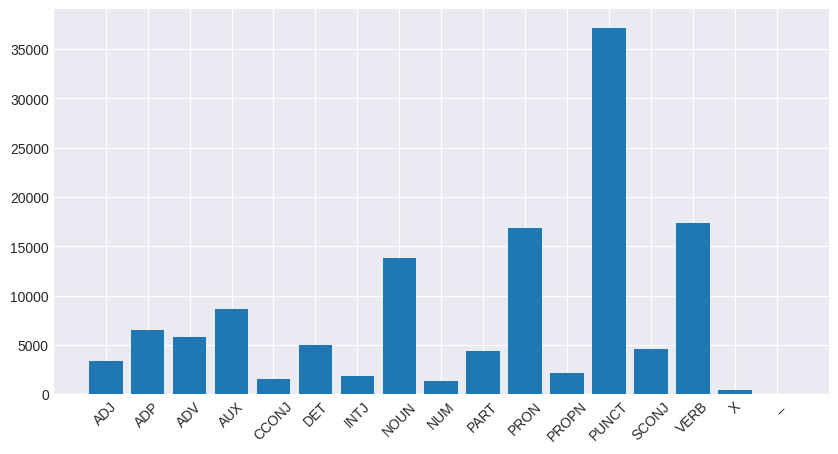

In [56]:
## Traçons l'histogramme

plt.bar(upos_counter.keys(), upos_counter.values())
plt.xticks(rotation=45) # pour que les étiquettes soient lisibles (on les tourne de 45°)

Les ponctuations sont grandement dominantes, il faudra faire attention à ce que ça ne biaise pas les évaluations du parseur (il est généralement plus facile de faire des prédictions sur les ponctuations)

## Distance et ordre syntaxique

In [60]:
# Le naija est t'il une langue à tête initiale ou finale ?
# Pour cela, nous allons compter le nombre de dépendances allant vers la gauche et vers la droite
left_n = 0
right_n = 0
for sentence in sentences:
    for token in sentence['treeJson']['nodesJson'].values():
        if token['ID'] == '0':
            # On ne compte pas les racines
            continue

        if token['HEAD'] < int(token['ID']):
            right_n += 1
        else:
            left_n += 1
print("Il y a {} dépendances vers la gauche et {} vers la droite".format(left_n, right_n))


Il y a 53372 dépendances vers la gauche et 77670 vers la droite


In [70]:
# Est-ce que ces directions sont différentes selon les catégories du discours ?
# Pour cela, nous allons compter le nombre de dépendances allant vers la gauche et vers la droite pour chaque catégorie du discours
# Nous allons utiliser un dictionnaire de dictionnaires pour stocker ces informations
# Le premier niveau de clé sera la catégorie du discours
# Le second niveau de clé sera la direction de la dépendance (left ou right)
# La valeur sera le nombre de dépendances dans cette catégorie et dans cette direction

upos_directions = {}
for sentence in sentences:
    for token in sentence['treeJson']['nodesJson'].values():
        if token['ID'] == '0':
            # On ne compte pas les racines
            continue

        if token['UPOS'] not in upos_directions:
            upos_directions[token['UPOS']] = {'left': 0, 'right': 0}

        if token['HEAD'] < int(token['ID']):
            upos_directions[token['UPOS']]['right'] += 1
        else:
            upos_directions[token['UPOS']]['left'] += 1
upos_directions = {k: v for k, v in sorted(upos_directions.items(), key=lambda item: item[0])}        
print(json.dumps(upos_directions, indent=4))


{
    "ADJ": {
        "left": 1920,
        "right": 1428
    },
    "ADP": {
        "left": 1022,
        "right": 5551
    },
    "ADV": {
        "left": 3082,
        "right": 2712
    },
    "AUX": {
        "left": 37,
        "right": 8598
    },
    "CCONJ": {
        "left": 1537,
        "right": 47
    },
    "DET": {
        "left": 4815,
        "right": 166
    },
    "INTJ": {
        "left": 1300,
        "right": 615
    },
    "NOUN": {
        "left": 3967,
        "right": 9840
    },
    "NUM": {
        "left": 776,
        "right": 547
    },
    "PART": {
        "left": 1604,
        "right": 2812
    },
    "PRON": {
        "left": 12032,
        "right": 4795
    },
    "PROPN": {
        "left": 638,
        "right": 1530
    },
    "PUNCT": {
        "left": 18957,
        "right": 18213
    },
    "SCONJ": {
        "left": 1318,
        "right": 3330
    },
    "VERB": {
        "left": 288,
        "right": 17053
    },
    "X": {
        "left": 79,


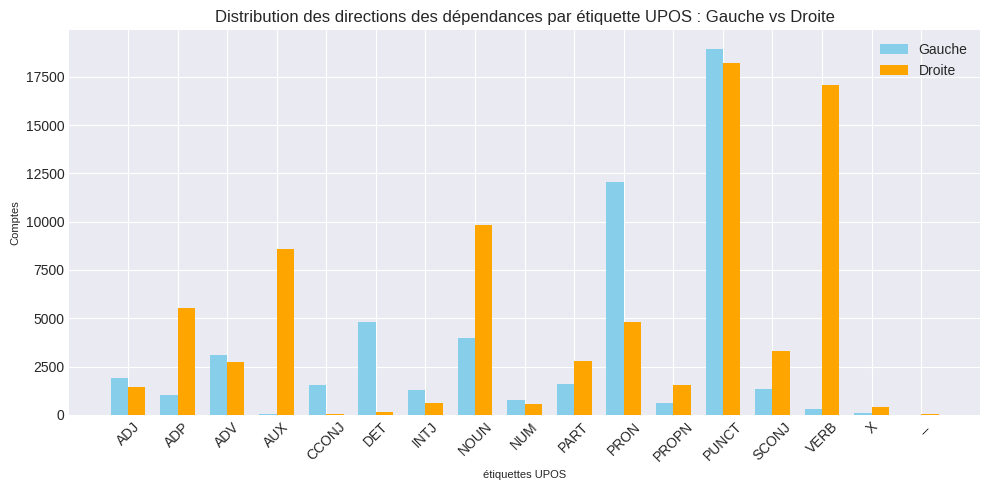

In [69]:
# Nous allons maintenant afficher ces informations dans un graphique en barres
# Deux options s'offrent à nous :
# - un graphique en barres empilées
# - un graphique en barres côte à côte
# Nous allons utiliser un graphique en barres côte à côte


# Séparons les données dans des listes "droite" et "gauche"
labels = list(upos_directions.keys())
left_values = [upos['left'] for upos in upos_directions.values()]
right_values = [upos['right'] for upos in upos_directions.values()]

fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.35  # épaisseur des barres
index = np.arange(len(labels))  # position des barres

# Traçage des barres de gauche
left_bars = ax.bar(index, left_values, bar_width, label='Gauche', color='skyblue')

# Traçage des barres de gauche
right_bars = ax.bar(index + bar_width, right_values, bar_width, label='Droite', color='orange')

# Add labels, title, and legend
ax.set_xlabel('étiquettes UPOS')
ax.set_ylabel('Comptes')
ax.set_title('Distribution des directions des dépendances par étiquette UPOS : Gauche vs Droite')
ax.set_xticks(index + bar_width / 2)  # Position x-axis ticks in the center of the two bars
ax.set_xticklabels(labels)
ax.legend()

# Rotate the x-axis labels to 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [76]:
# Ce graphique est intéressant, mais on voudrait aussi connaitre la direction en fonction de la 
# catégorie du discours du gouverneur (HEAD) et afficher cela dans une matrice de confusion

# Pour cela, nous allons d'abord faire notre dictionnaire de dictionnaire de dictionnaire
# Le premier niveau de clé sera la catégorie du discours du gouverneur (HEAD)
# Le second niveau de clé sera la catégorie du discours du dépendant (DEP)
# Le troisième niveau de clé sera la direction de la dépendance (left ou right)
# La valeur sera le nombre de dépendances dans cette catégorie et dans cette direction

head_dep_directions = {}

for sentence in sentences:
    for token in sentence['treeJson']['nodesJson'].values():
        if token['HEAD'] == 0:
            # On ne compte pas les cas ou la tête est la racine
            continue
        head_token = sentence['treeJson']['nodesJson'][str(token['HEAD'])]
        head_ID = head_token['ID']
        head_UPOS = head_token['UPOS']

        this_upos = token['UPOS']
        if head_UPOS not in head_dep_directions:
            head_dep_directions[head_UPOS] = {}

        if this_upos not in head_dep_directions[head_UPOS]:
            head_dep_directions[head_UPOS][this_upos] = {'left': 0, 'right': 0}

        if token['HEAD'] < int(token['ID']):
            head_dep_directions[head_UPOS][this_upos]['right'] += 1
        else:
            head_dep_directions[head_UPOS][this_upos]['left'] += 1

# On trie le dictionnaire par ordre alphabétique
head_dep_directions = {k: v for k, v in sorted(head_dep_directions.items(), key=lambda item: item[0])}
# Et on trie les dictionnaires imbriqués par ordre alphabétique
for head_upos in head_dep_directions:
    head_dep_directions[head_upos] = {k: v for k, v in sorted(head_dep_directions[head_upos].items(), key=lambda item: item[0])}


print(json.dumps(head_dep_directions, indent=4))

# Nous allons maintenant afficher ces informations dans une matrice de confusion
# Pour cela, nous allons utiliser la librairie matplotlib

# Nous allons utiliser une fonction de la librairie matplotlib pour afficher la matrice de confusion
# Cette fonction prend en paramètre une matrice de confusion et une liste d'étiquettes
# Elle affiche la matrice de confusion dans un graphique
# Elle retourne un objet "figure" qui contient le graphique
# Nous allons utiliser cet objet pour ajouter un titre à notre graphique


{
    "ADJ": {
        "ADJ": {
            "left": 35,
            "right": 203
        },
        "ADP": {
            "left": 19,
            "right": 228
        },
        "ADV": {
            "left": 229,
            "right": 48
        },
        "AUX": {
            "left": 0,
            "right": 24
        },
        "CCONJ": {
            "left": 46,
            "right": 1
        },
        "DET": {
            "left": 83,
            "right": 3
        },
        "INTJ": {
            "left": 36,
            "right": 14
        },
        "NOUN": {
            "left": 122,
            "right": 73
        },
        "NUM": {
            "left": 1,
            "right": 5
        },
        "PART": {
            "left": 62,
            "right": 59
        },
        "PRON": {
            "left": 176,
            "right": 25
        },
        "PROPN": {
            "left": 9,
            "right": 17
        },
        "PUNCT": {
            "left": 608,
            "right": 4

In [120]:
# Pour la matricde de confusion, il nous faut, pour chaque paire de catégories du discours (HEAD, DEP),
# un ratio de gouvernance à droite par rapport au nombre total de gouvernance
# Nous allons donc créer un dictionnaire de dictionnaire de dictionnaire de ratio
# Le premier niveau de clé sera la catégorie du discours du gouverneur (HEAD)
# Le second niveau de clé sera la catégorie du discours du dépendant (DEP)

head_dep_ratios = {}
head_dep_total = {}

for head_upos in head_dep_directions:
    head_dep_ratios[head_upos] = {}
    head_dep_total[head_upos] = {}
    for dep_upos in head_dep_directions[head_upos]:
        left_relation = head_dep_directions[head_upos][dep_upos]['left']
        right_relation = head_dep_directions[head_upos][dep_upos]['right']
        total_relation = left_relation + right_relation
        if total_relation < 10:
            head_dep_ratios[head_upos][dep_upos] = 0
        else:
            head_dep_ratios[head_upos][dep_upos] = (right_relation + 0.0001) / total_relation 
        head_dep_total[head_upos][dep_upos] = total_relation

print(json.dumps(head_dep_ratios, indent=4))
print(json.dumps(head_dep_total, indent=4))

{
    "ADJ": {
        "ADJ": 0.8529415966386554,
        "ADP": 0.9230773279352227,
        "ADV": 0.173285559566787,
        "AUX": 1.0000041666666666,
        "CCONJ": 0.02127872340425532,
        "DET": 0.03488488372093024,
        "INTJ": 0.280002,
        "NOUN": 0.3743594871794872,
        "NUM": 0,
        "PART": 0.487604132231405,
        "PRON": 0.12437860696517412,
        "PROPN": 0.65385,
        "PUNCT": 0.41085281007751934,
        "SCONJ": 0.7500019230769231,
        "VERB": 0.9302348837209303,
        "X": 0
    },
    "ADP": {
        "ADJ": 0.9484546391752577,
        "ADP": 0.9748113350125944,
        "ADV": 0.8102897106109325,
        "AUX": 0.9965989795918366,
        "CCONJ": 3.3333333333333333e-06,
        "DET": 0.8518555555555556,
        "INTJ": 0.26087173913043477,
        "NOUN": 0.9970898872317207,
        "NUM": 1.0000013333333333,
        "PART": 0.960004,
        "PRON": 0.9957144285714286,
        "PROPN": 1.0000002096436058,
        "PUNCT": 0.598845

In [121]:
head_dep_ratios['PUNCT']

{'ADP': 0, 'NUM': 0, 'PUNCT': 0}

/tmp/ipykernel_10440/2412946675.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  confusion_matrix = upos_df.groupby(upos_df.columns, axis=1).sum().astype(int)


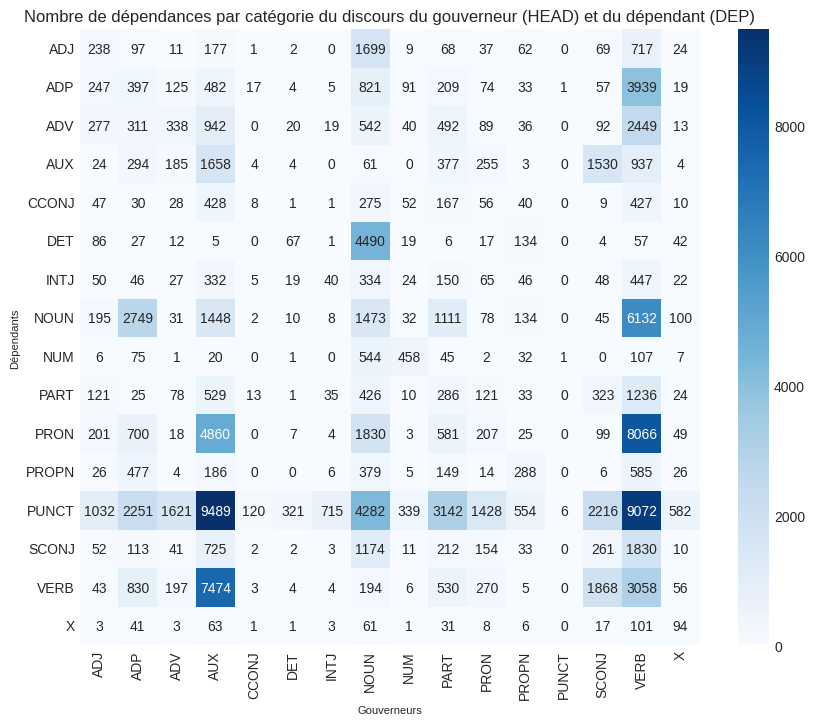

In [122]:
# Nous allons d'abord afficher le nombre de relation par pair de catégories du discours
# Il est important de faire cela avant d'afficher le ratio, car le ratio ne veut rien dire si le nombre de relation est trop faible

import pandas as pd
import seaborn as sns
# Créer un DataFrame pandas pour stocker les données
upos_df = pd.DataFrame(head_dep_total)
confusion_matrix = upos_df.groupby(upos_df.columns, axis=1).sum().astype(int)

# Créer la matrice de confusion avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='d')

# Ajouter les titres et labels
plt.title('Nombre de dépendances par catégorie du discours du gouverneur (HEAD) et du dépendant (DEP)')
plt.xlabel('Gouverneurs')
plt.ylabel('Dépendants')

# Afficher la matrice de confusion
plt.show()

/tmp/ipykernel_10440/3821319378.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  confusion_matrix = upos_df.groupby(upos_df.columns, axis=1).sum()


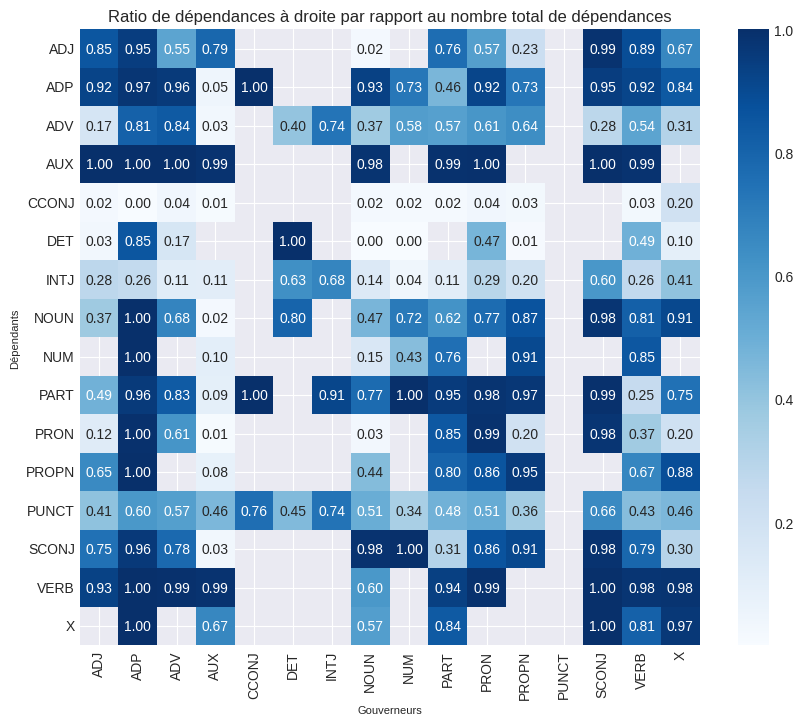

In [124]:
import pandas as pd
import seaborn as sns
# Créer un DataFrame pandas pour stocker les données
upos_df = pd.DataFrame(head_dep_ratios)
# Pour les besoins de la visualisation, nous allons sommer les valeurs de 'left' et 'right'
# pour chaque paire d'étiquettes UPOS
confusion_matrix = upos_df.groupby(upos_df.columns, axis=1).sum()
confusion_matrix.replace(0, np.nan, inplace=True)

# Créer la matrice de confusion avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='.2f')

# Ajouter les titres et labels
plt.title('Ratio de dépendances à droite par rapport au nombre total de dépendances')
plt.xlabel('Gouverneurs')
plt.ylabel('Dépendants')

# Afficher la matrice de confusion
plt.show()

### Questions :
Dans ce treebank du Naija SUD :
- L'auxiliaire est-t'il plus souvent dépendant ou gouverneur ? 
- Une ponctuation peut-elle gouverner une non-ponctuation ? Arriverez vous à retrouver ces cas dans le treebank ?
- Quelles sont les catégories qui gouvernent le plus ?
- Et quelles sont les catégories qui gouvernent le moins ?

## Typométrie

In [15]:
# Calculons le nombre de nom propre/nom commun par phrase en moyenne dans ce corpus

In [16]:
# Calculons le nombre de verbe par phrase en moyenne dans ce corpus
